In [1]:
import numpy as np
import os
import itertools
import pickle

from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceEntropy, BettiCurve, PersistenceLandscape, HeatKernel
from gtda.diagrams import PairwiseDistance
import tmd
import tmd.view as view

import utils
import plotting
import diagrams

from celluloid import Camera
from matplotlib import cm

import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [112]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
prefix = "../data/June2020/"
regions = ["Retina_IPL", "Retina_OPL"]
ages = ["Adult"] + ["P" + str(i) for i in range(0, 30)]
genders = ["F", "M", "U"]

In [ ]:
populations_dev = {}

In [ ]:
for region, age, gender in itertools.product(regions, ages, genders):
    directory = f"{prefix}/{region}/Development/{age}/{gender}"
    try:
        traces = os.listdir(directory)
    except FileNotFoundError:
        continue
    except:
        raise
    key = (region, age, gender)
    populations_dev[key] = {}
    for trace in traces:
        try:
            populations_dev[key][trace] = tmd.io.load_population(f"{directory}/{trace}")
        except KeyboardInterrupt:
            raise
        except:
            continue

In [99]:
microglia_data = {}
for key in populations_dev.keys():
    for filename, population in populations_dev[key].items():
        filename = filename.replace("-", "_")
        microglia_data[filename] = np.array([neuron.soma.get_center() for neuron in population.neurons])

In [100]:
len_vals = []
for value in microglia_data.values():
    len_vals.append(len(value))

In [106]:
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True

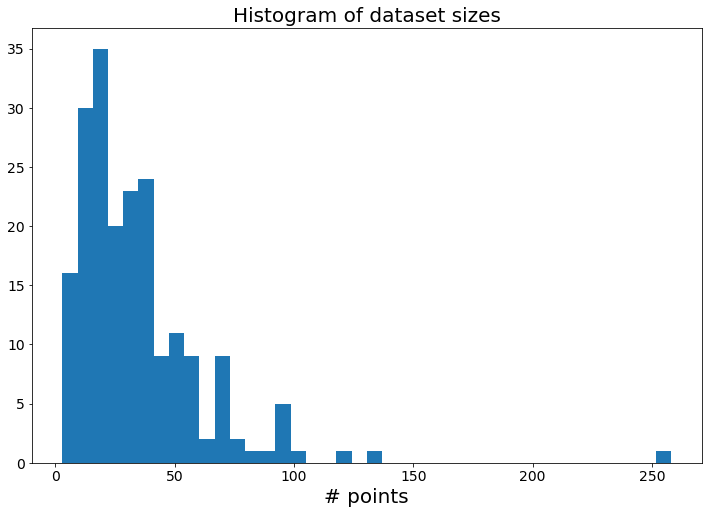

In [107]:
plt.figure(figsize=(12, 8))
plt.title("Histogram of dataset sizes")
plt.hist(len_vals, bins=40)
plt.xlabel("# points")
plt.show()

In [ ]:
# the homology ranks we choose to consider
homologyDimensions = (0, 1, 2)
persistenceDiagram = VietorisRipsPersistence(metric='euclidean',
                                             homology_dimensions=homologyDimensions,
                                             n_jobs=-1)

diagrams = {}
for filename, data in microglia_data.items():
    print("Processing file:", filename)
    print("# points:", data.shape[0])
    diagrams[filename] = persistenceDiagram.fit_transform([data])[0]
    print("Total # bars:", len(diagrams[filename]))

# Initializing the distances

In [3]:
# the homology ranks we choose to consider
homologyDimensions = (0, 1, 2)
persistenceDiagram = VietorisRipsPersistence(metric='precomputed',
                                             homology_dimensions=homologyDimensions,
                                             n_jobs=-1)
landscape_distance = PairwiseDistance(metric='landscape')
bottleneck_distance = PairwiseDistance(metric='bottleneck')
wasserstein_distance = PairwiseDistance(metric='wasserstein')
betti_distance = PairwiseDistance(metric='betti')

# Data Loading

In [4]:
bars_neurons = pickle.load(open("data/new_bars_neur.pkl", "rb"))
populations_dev = pickle.load(open("data/new_pop_dev.pkl","rb"))
ph_neurons = pickle.load(open("data/new_ph_neurons.pkl", "rb"))
diagrams_dev = pickle.load(open("data/new_diag_dev.pkl","rb"))

In [5]:
all_populations = {}
for sub_populations in populations_dev.values():
    for filename, population in sub_populations.items():
        all_populations[filename] = population.neurons

We have precomputed the weighted persistence diagrams for both diagram distance and image distances

In [6]:
load_data = True

if load_data:
    betti_img_diagrams = pickle.load(open("data/betti_img_weighted_diagrams.pkl", "rb"))
    wass_img_diagrams = pickle.load(open("data/wass_img_weighted_diagrams_00_07_09_10.pkl", "rb"))
    land_img_diagrams = pickle.load(open("data/land_img_weighted_diagrams.pkl", "rb"))
    bottleneck_img_diagrams = pickle.load(open("data/bottleneck_img_weighted_diagrams.pkl", "rb"))

    wass_diagrams = pickle.load(open("data/new_wass_weighted_diagrams_00_09_099_10.pkl", "rb"))
    betti_diagrams = pickle.load(open("data/new_betti_weighted_diagrams_00_03_05_10.pkl", "rb"))
    land_diagrams = pickle.load(open("data/new_land_weighted_diagrams_00_03_05_10.pkl", "rb"))
    bottleneck_diagrams = pickle.load(open("data/new_bottleneck_weighted_diagrams_00_03_05_10.pkl", "rb"))

If you want to recompute the diagrams (or to compute with another coefficients), please set the `load_data` to `False` and run the following cells (each one may take around an hour of computation)

# Computing Diagrams

### Computing Weighted Image Distance Diagrams

In [7]:
load_data = False

In [ ]:
if not load_data:
    eucl_coefs = [0, 0.7, 0.9, 1.0]
    wass_img_diagrams = diagrams.build_total_weighted_diagram_image_eucl(wasserstein_distance, 
                                                                         bars_neurons,
                                                                         all_populations,
                                                                         eucl_coefs)

In [ ]:
if not load_data:
    eucl_coefs = [0, 0.7, 0.9, 1.0]
    betti_img_diagrams = build_total_weighted_diagram_image_eucl(betti_distance, eucl_coefs)

In [ ]:
if not load_data:
    eucl_coefs = [0, 0.7, 0.9, 1.0]
    land_img_diagrams = build_total_weighted_diagram_image_eucl(landscape_distance, eucl_coefs)

In [ ]:
if not load_data:
    eucl_coefs = [0, 0.7, 0.9, 1.0]
    bottleneck_img_diagrams = build_total_weighted_diagram_image_eucl(bottleneck_distance, eucl_coefs)

### Computing Weighted Diagram Distance Diagrams

In [ ]:
if not load_data:
    eucl_coefs = [0, 0.9, 0.99, 1.0]
    wass_img_diagrams = build_total_weighted_diagram_diag_eucl(wasserstein_distance, eucl_coefs)

In [ ]:
if not load_data:
    eucl_coefs = [0, 0.7, 0.9, 1.0]
    betti_img_diagrams = build_total_weighted_diagram_diag_eucl(betti_distance, eucl_coefs)

In [ ]:
if not load_data:
    eucl_coefs = [0, 0.7, 0.9, 1.0]
    land_img_diagrams = build_total_weighted_diagram_diag_eucl(landscape_distance, eucl_coefs)

In [ ]:
if not load_data:
    eucl_coefs = [0, 0.7, 0.9, 1.0]
    bottleneck_img_diagrams = build_total_weighted_diagram_diag_eucl(bottleneck_distance, eucl_coefs)

# Analysis

In [12]:
def plot_diagram(filename, subplot, title):
    plt.subplot(subplot)
    plt.title(title)
    indexes = diagrams[filename][:, 2] == 1
    x, y = diagrams[filename][indexes][:, :2].T
    plt.scatter(x, y)
    plt.xlim(20, 150)
    plt.ylim(20, 150)

In [13]:
def plot_all_grouped_conf_matrices(diagrams, pairwise_distance, *order):
    plt.figure(figsize=(16, 6))
    for i, diagram in enumerate(diagrams.values()):
        plt.subplot(1, len(diagrams.keys()), i + 1)
        alpha = list(diagrams.keys())[i]
        plt.title(f"{alpha:.2f} * euclid + {1 - alpha:.2f} * imag")
        utils.plot_grouped_conf_matrix(diagram, 
                                       pairwise_distance, 
                                       *order, 
                                       subplot=(1, len(diagrams.keys()), i + 1), 
                                       show_colorbar=True)
    plt.show()

Wasserstein Distance: Euclidian + Bottleneck Diagram distances, IPL region


/Users/ocksumoron/Documents/EPFL_MA4/bbp/Notebooks/utils.py:320: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(*subplot)


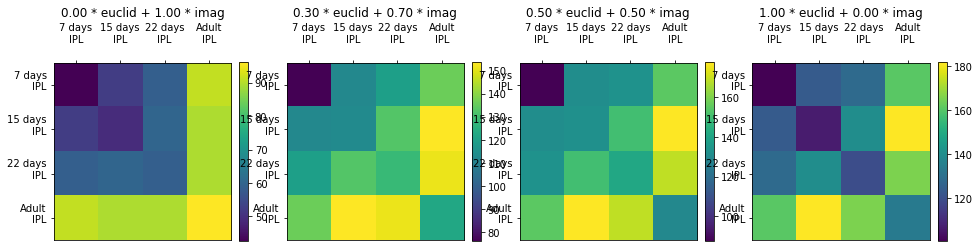

In [35]:
print("Wasserstein Distance: Euclidian + Bottleneck Diagram distances, IPL region")
plot_all_grouped_conf_matrices(land_diagrams, wasserstein_distance, ["P7", "P15", "P22", "Pa"], ["IPL"])

Wasserstein Distance: Euclidian + Wass Diagram distances, IPL region


/Users/ocksumoron/Documents/EPFL_MA4/bbp/Notebooks/utils.py:320: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(*subplot)


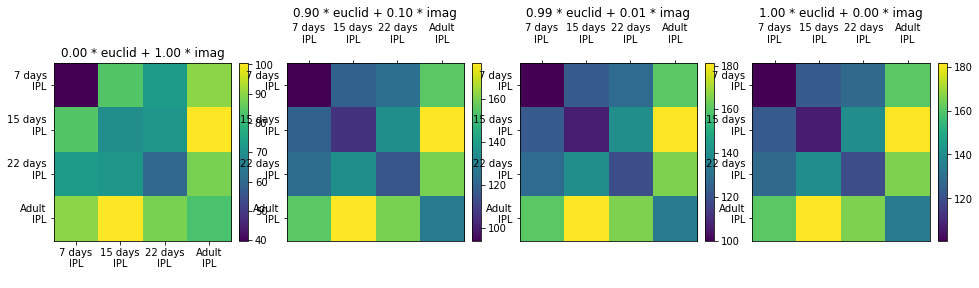

In [14]:
print("Wasserstein Distance: Euclidian + Wass Diagram distances, IPL region")
plot_all_grouped_conf_matrices(wass_diagrams, wasserstein_distance, ["P7", "P15", "P22", "Pa"], ["IPL"])

Wasserstein Distance: Euclidian + Wass Diagram distances, IPL region


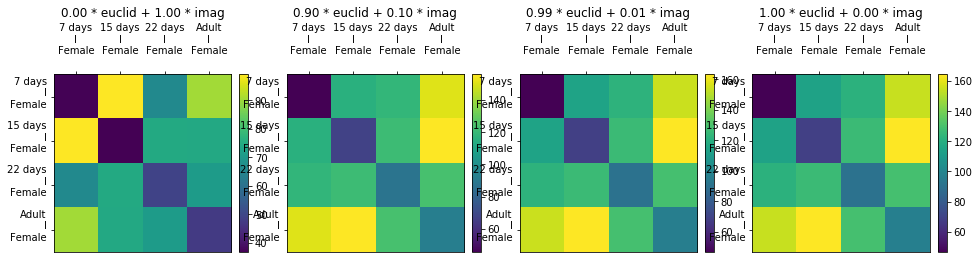

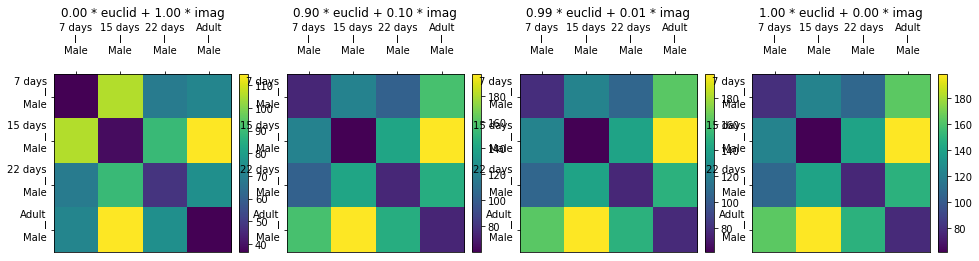

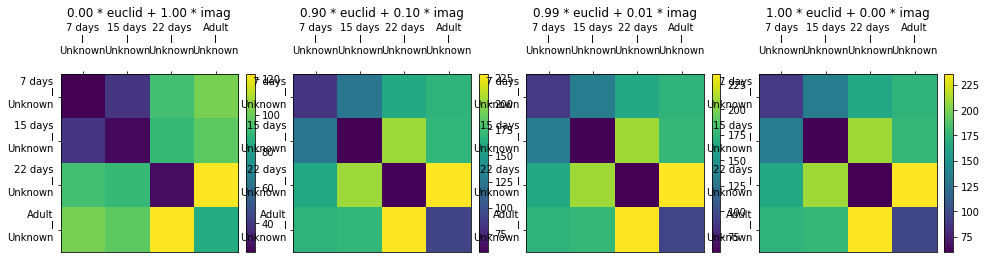

In [19]:
print("Wasserstein Distance: Euclidian + Wass Diagram distances, IPL region")
plot_all_grouped_conf_matrices(wass_diagrams, wasserstein_distance, ["P7", "P15", "P22", "Pa"], ["IPL"], ["Sex_f"])
plot_all_grouped_conf_matrices(wass_diagrams, wasserstein_distance, ["P7", "P15", "P22", "Pa"], ["IPL"], ["Sex_m"])
plot_all_grouped_conf_matrices(wass_diagrams, wasserstein_distance, ["P7", "P15", "P22", "Pa"], ["IPL"], ["Sex_u"])